# Description

The dataset represents weekly retail scan data for National retail volume (units) and price for 2015 and 2016. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2015, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold
    
In the given dataset we have to use the information and train a model which can predict the Average Price of an Avocado. As th price is continous in nature we will use Regression approach for this. Lets Begin !!

In [6]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [149]:
# Importing Dataset into a Dataframe

avocado=pd.read_csv('avocado.csv')

In [138]:
pd.set_option('display.max_rows',None)

In [139]:
pd.set_option('display.max_columns',None)

# Overview of dataset and correction

In [140]:
# Checking Dataset Content

avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [141]:
avocado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we see there is no data in the datset down the line. We eill drop null values. 

In [142]:
# Checking shape of the dataset

avocado.shape

(16468, 14)

In [155]:
# Dropping Nul value row wise and Dropping non required index column

avocado=avocado.dropna(axis=0)
avocado=avocado.drop(['Unnamed: 0'],axis=1)

In [156]:
# Checking Dataset

avocado.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte
1516,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016.0,Charlotte


In [157]:
# Checking shape of newly formed dataframe

avocado.shape

(1517, 13)

In [158]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


In [30]:
avocado.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

Only 3 columns are object type.

In [159]:
# Checking unique values in each column

avocado.nunique()

Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

We have 1 type of Avocado i.e Conventional

There are 51 regions producing Avocado.

Data is for 2 year span.

In [168]:
# Checking Value counts of data in columns

print('Data Count of type columns \n\n',avocado['type'].value_counts(),"\n")
print('-----------------------------')
print('Data Count of region column \n\n',avocado['region'].value_counts(),"\n")

Data Count of type columns 

 conventional    1517
Name: type, dtype: int64 

-----------------------------
Data Count of region column 

 California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
Har

# Exploring Datset

Converting DATE column from object to datetime format for exploration. Later on we will drop this column before model training

In [170]:
# importing datetime and converting Date column

from datetime import datetime

avocado['Date']=pd.to_datetime(avocado['Date'])

(array([  7.,  13.,  15.,  32.,  50.,  63.,  60., 109., 199., 234., 210.,
        183., 144.,  67.,  60.,  31.,  14.,  11.,   9.,   6.]),
 array([0.49  , 0.5495, 0.609 , 0.6685, 0.728 , 0.7875, 0.847 , 0.9065,
        0.966 , 1.0255, 1.085 , 1.1445, 1.204 , 1.2635, 1.323 , 1.3825,
        1.442 , 1.5015, 1.561 , 1.6205, 1.68  ]),
 <BarContainer object of 20 artists>)

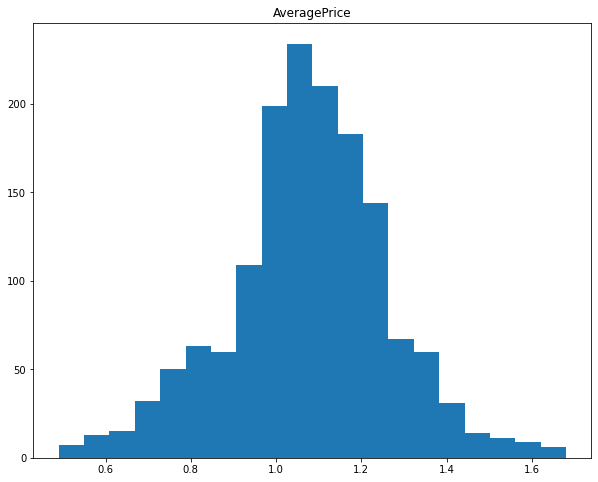

In [171]:
# Checking Average Price column

plt.figure(figsize=(10,8))
plt.title('AveragePrice')
plt.hist(avocado['AveragePrice'],bins=20)

We see a normal distribution with average mostly concentrated between 0.9 to 1.3.

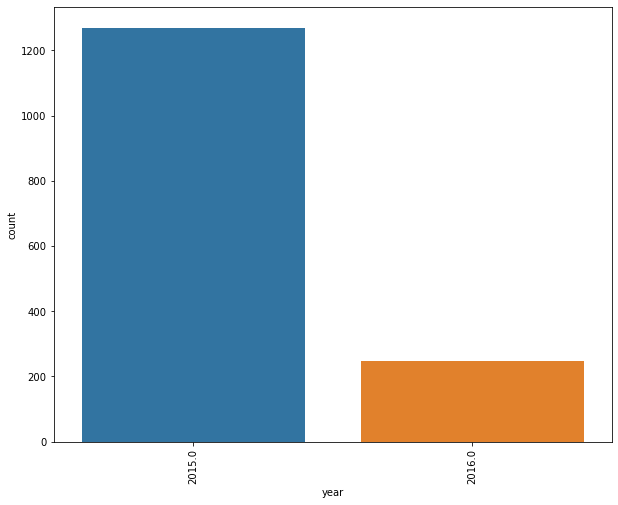

In [172]:
# Checking Year Column count

plt.figure(figsize=(10,8))
sns.countplot('year',data=avocado)
plt.xticks(rotation=90)
plt.show()

Year 2015 has higher count than 2016

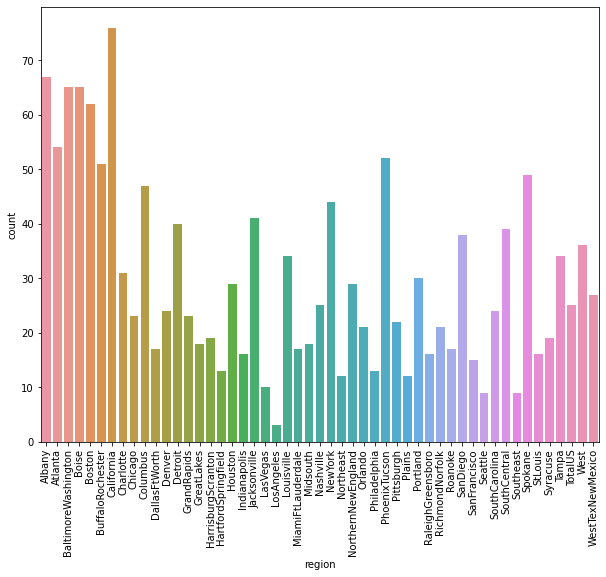

In [173]:
# Checking region count

plt.figure(figsize=(10,8))
sns.countplot('region',data=avocado)
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis

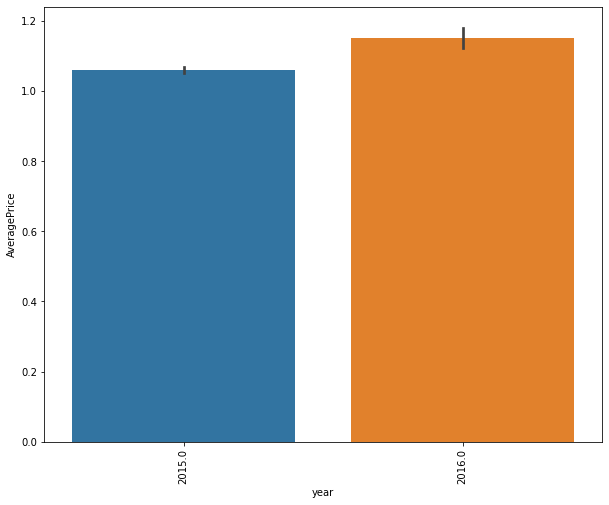

In [174]:
# Checking Average Price as per year

plt.figure(figsize=(10,8))
sns.barplot('year','AveragePrice',data=avocado)
plt.xticks(rotation=90)
plt.show()

Average price was higher in the year 2016

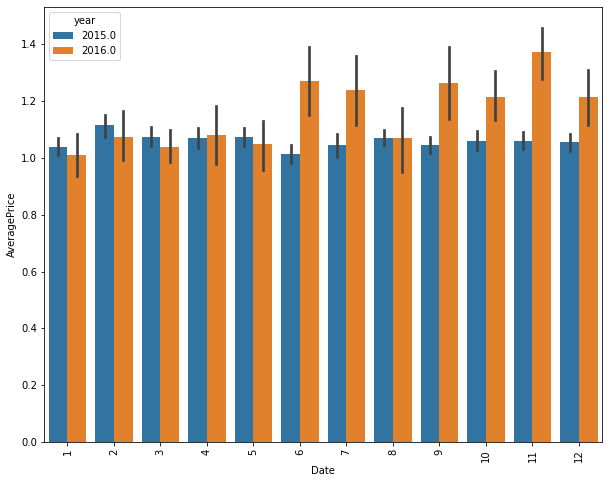

In [175]:
# Average price month wise in terms of year

plt.figure(figsize=(10,8))
sns.barplot(avocado['Date'].dt.month,'AveragePrice',hue='year',data=avocado)
plt.xticks(rotation=90)
plt.show()

In the year 2015 we have almost similar average price for all the months. February shows a very little hike.
While in 2016 we observe significant hike starting from June till December. November records highest average price for an avocado.

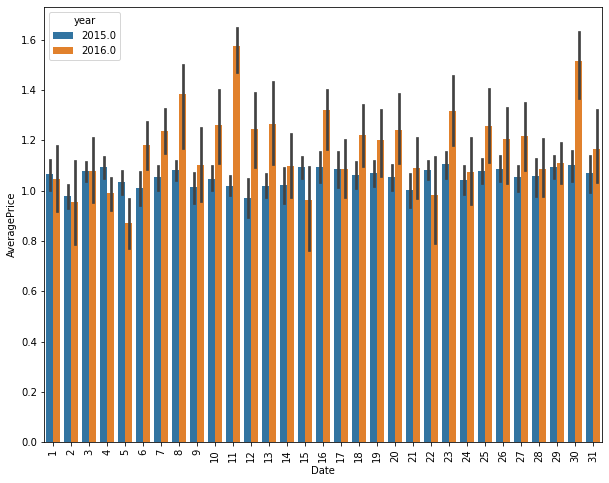

In [183]:
# Average price day wise in terms of year

plt.figure(figsize=(10,8))
sns.barplot(avocado['Date'].dt.day,'AveragePrice',hue='year',data=avocado)
plt.xticks(rotation=90)
plt.show()

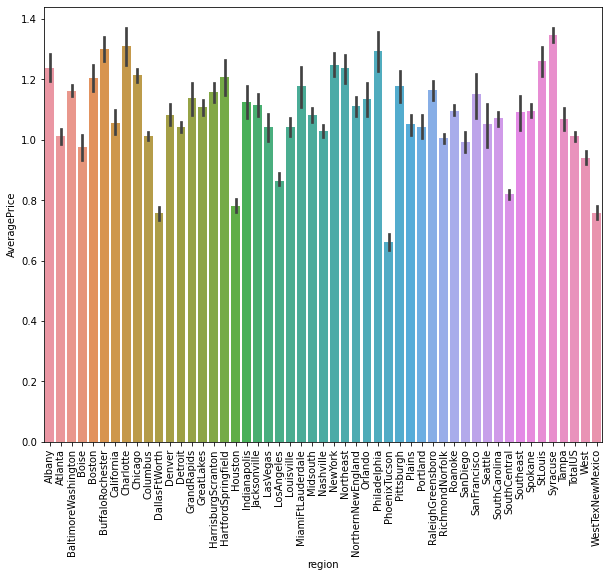

In [176]:
# Checking average price as per region

plt.figure(figsize=(10,8))
sns.barplot('region','AveragePrice',data=avocado)
plt.xticks(rotation=90)
plt.show()

Syracuse records highest average price for an avocado followed by Charlotte, BuffaloRochester, Philadelphia and St.Louis.
Least average price was recorded in Phoenix Tucson

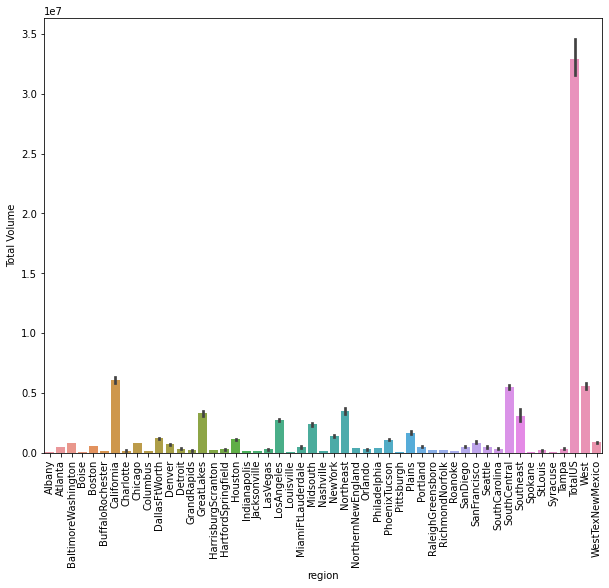

In [194]:
# Checking Avocado volume as per region

plt.figure(figsize=(10,8))
sns.barplot('region','Total Volume',data=avocado)
plt.xticks(rotation=90)
plt.show()

California produces highest number of avocados follwed by West and South Central Region.

# Statistical Analytics

In [195]:
avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


We observe difference in mean and the median values. Mean is higher then median in almost all the columns. Also there is difference between 75th percentile value and max value. This represent possibility of outliers. We will pot boxplot to have a better view of outliers.

# Checking Correlation

In [27]:
avocado_cor=avocado.corr()

In [196]:
#Checking Correlation Matrix

avocado_cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


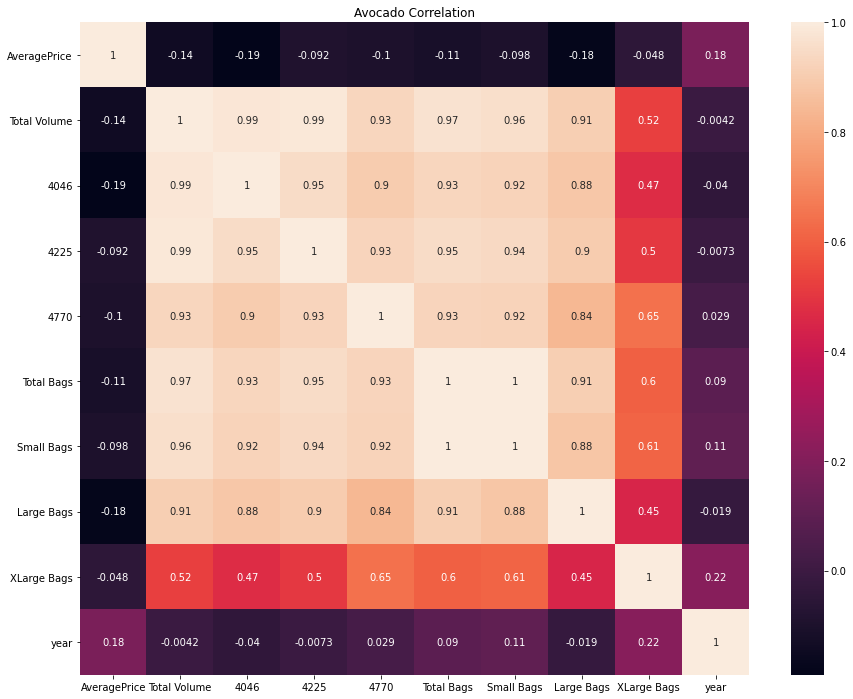

In [197]:
# Visualizing Correlation Matrix with heatmap

plt.figure(figsize=(15,12))
plt.title('Avocado Correlation')
sns.heatmap(avocado_cor,annot=True)
plt.show()

In [29]:
# Having an ordered view of correlation with Average Price

avocado_cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
year            0.178683
XLarge Bags    -0.048284
4225           -0.092084
Small Bags     -0.097682
4770           -0.100567
Total Bags     -0.111597
Total Volume   -0.140470
Large Bags     -0.177480
4046           -0.190096
Name: AveragePrice, dtype: float64

There is no direct positive correlation with target column apart from year. Although in terms of negatively correlated columns, XLarge Bags is the least negatively correlated feature while 4046 PLU is the most negatively correlated column.

# Checking outliers

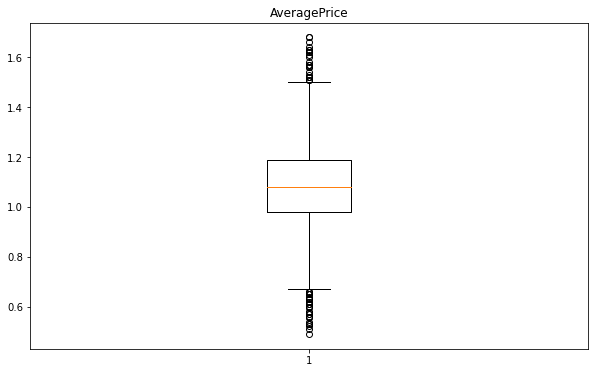

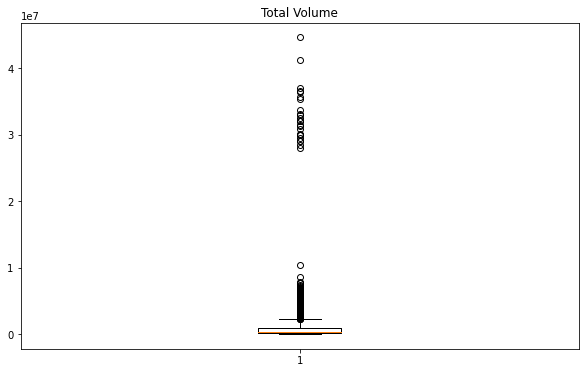

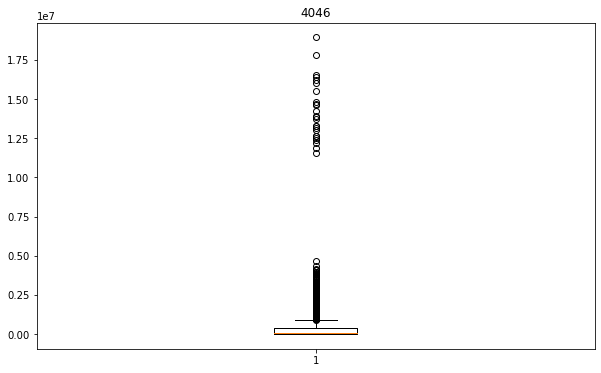

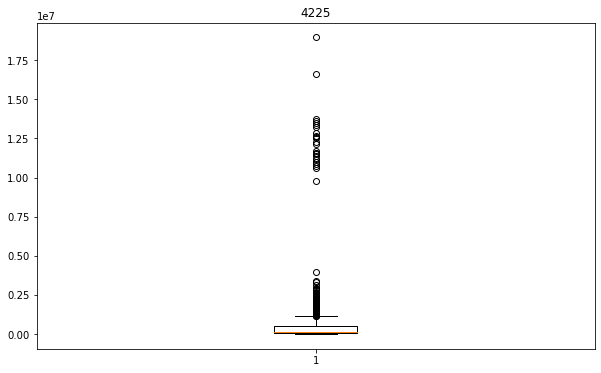

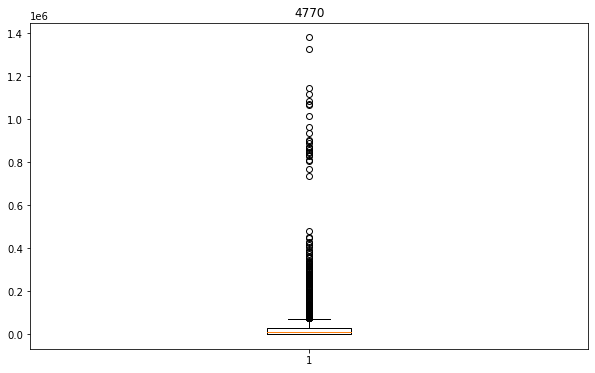

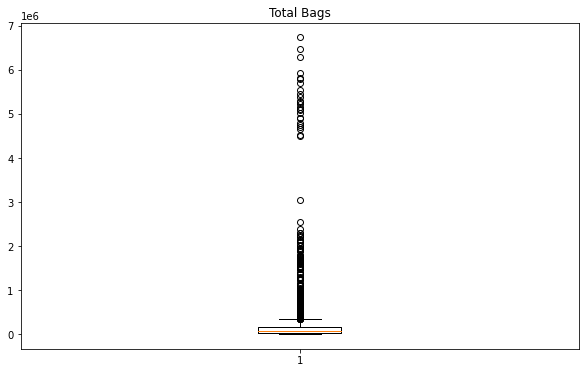

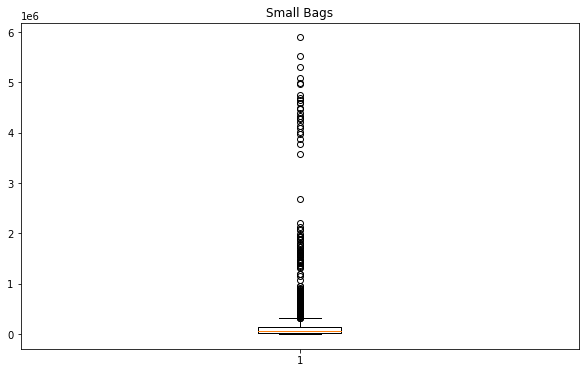

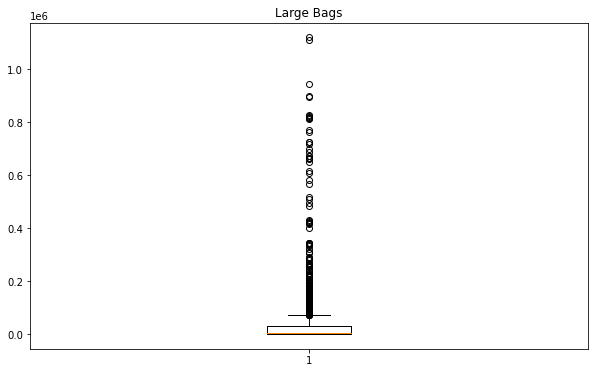

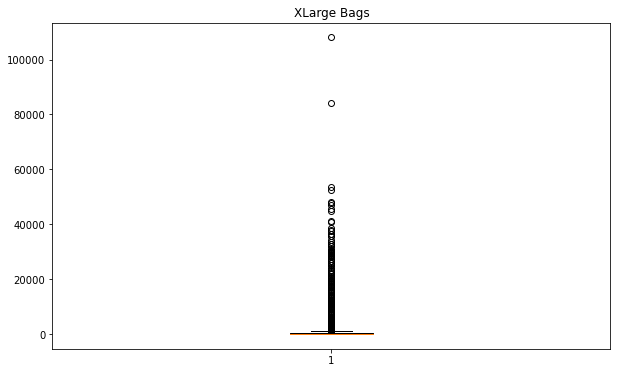

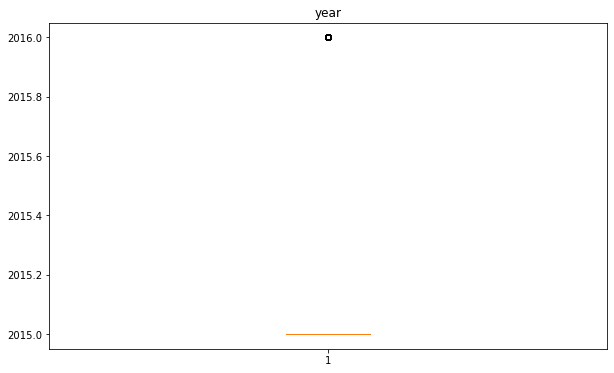

In [198]:
for i in avocado.columns:
    if avocado[i].dtypes=='float64':
        plt.figure(figsize=(10,6))
        plt.title(i)
        plt.boxplot(avocado[i])
        plt.show()

We observe there are many outliers in most of the columns. But, as we observe a significant amount of data is out of the whiskers and follows similar pattern in every column.

Treating outliers with ZScore method hampers the data to a great extent and result in data loss. Thus we will skip outlier removal and continue with the outliers.

Some amount of outliers will be taken care of while treating skewness if any.

# Encoding

In [199]:
# Dropping Date column

avocado=avocado.drop(['Date'],axis=1)

In [200]:
# Using Ordinal Encoder for changing string values to numeric form
from sklearn.preprocessing import OrdinalEncoder

In [201]:
# Applying Encoder on Type and Region Column

OE=OrdinalEncoder()
avocado['type']=OE.fit_transform(avocado['type'].values.reshape(-1,1))

avocado['region']=OE.fit_transform(avocado['region'].values.reshape(-1,1))

In [202]:
# Checking Dataset

avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015.0,0.0


# Checking Skewness

In [80]:
avocado.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

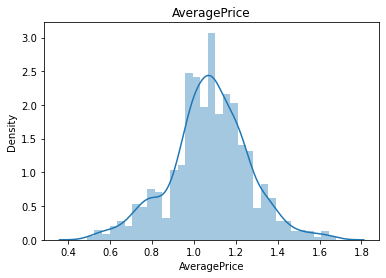

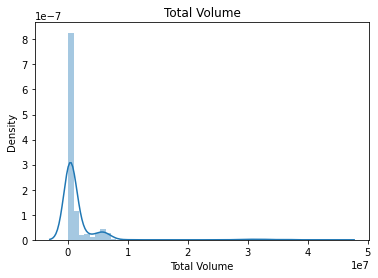

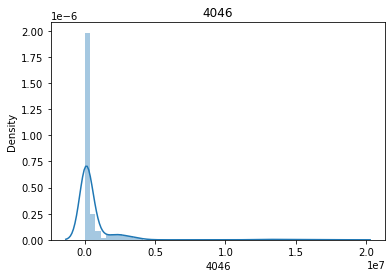

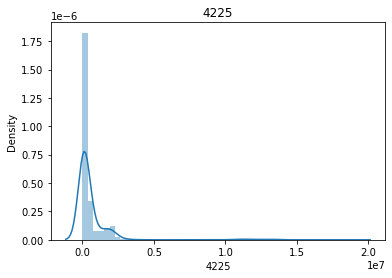

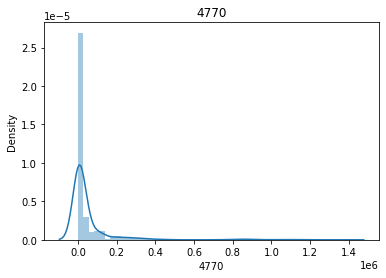

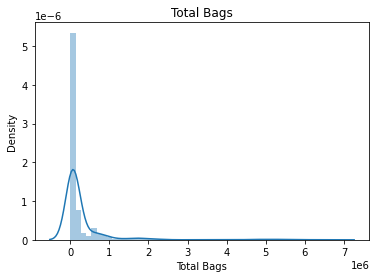

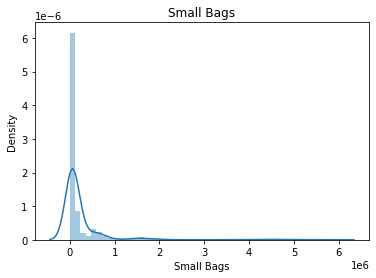

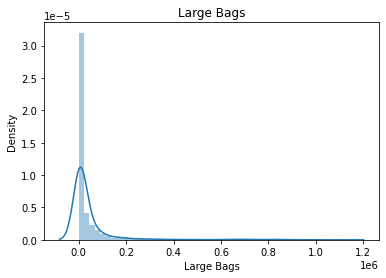

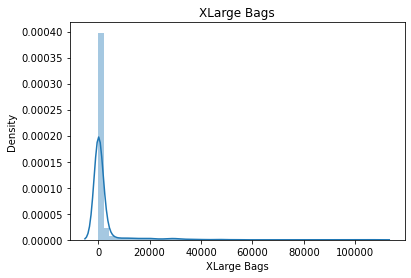

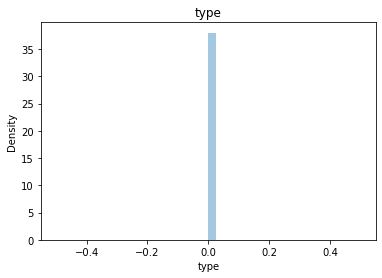

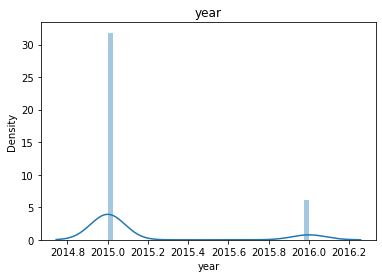

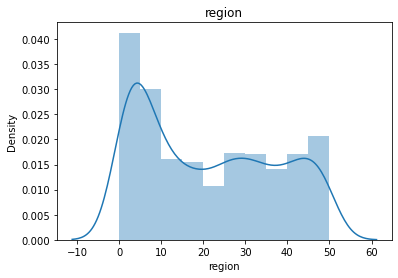

In [68]:
#Visualising Distribution

for i in avocado.columns:
    plt.figure()
    plt.title(i)
    sns.distplot(avocado[i])

Skewness is present in most of the columns.

# Skewness Correction

In [ ]:
from sklearn.preprocessing import power_transform
from scipy.stats import boxcox
for i in avocado.iloc[:,2:9]:
    if avocado[i].skew()>0.5:
        avocado[i]=power_transform(avocado[i].values.reshape(-1,1))
avocado['Total Volume']=boxcox(avocado['Total Volume'],0)

In [208]:
avocado.skew()

AveragePrice   -0.109444
Total Volume    0.667461
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
type            0.000000
year            1.828332
region          0.288146
dtype: float64

We used Power Transform method for most of the columns excluding Total volume as power transform was hampering the data of this particular column.

For Total Volumewe use boxcox method.

# Splitting Features and Target

In [209]:
x=avocado.drop(['AveragePrice'],axis=1)
y=avocado['AveragePrice']

In [210]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11.070329,-1.757736,-0.545363,-1.675878,-2.030217,-1.847586,-1.072172,-0.885019,0.0,2015.0,0.0
1,10.912849,-1.919557,-0.667814,-1.619934,-1.931468,-1.748426,-1.062461,-0.885019,0.0,2015.0,0.0
2,11.680304,-1.857996,-0.124940,-1.375858,-2.103934,-1.923541,-1.050081,-0.885019,0.0,2015.0,0.0
3,11.277104,-1.724410,-0.375219,-1.555093,-2.497084,-2.330946,-0.991861,-0.885019,0.0,2015.0,0.0
4,10.840357,-1.794175,-0.679011,-1.542167,-2.422996,-2.267260,-0.900922,-0.885019,0.0,2015.0,0.0


In [211]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [212]:
x.shape

(1517, 11)

In [213]:
y.shape

(1517,)

# Scaling

In [214]:
# Using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [216]:
x_new=sc.fit_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-1.356765,-1.757736,-0.545363,-1.675878,-2.030217,-1.847586,-1.072172,-0.885019,0.0,-0.441008,-1.314338
1,-1.466393,-1.919557,-0.667814,-1.619934,-1.931468,-1.748426,-1.062461,-0.885019,0.0,-0.441008,-1.314338
2,-0.932139,-1.857996,-0.124940,-1.375858,-2.103934,-1.923541,-1.050081,-0.885019,0.0,-0.441008,-1.314338
3,-1.212822,-1.724410,-0.375219,-1.555093,-2.497084,-2.330946,-0.991861,-0.885019,0.0,-0.441008,-1.314338
4,-1.516857,-1.794175,-0.679011,-1.542167,-2.422996,-2.267260,-0.900922,-0.885019,0.0,-0.441008,-1.314338


# Creating Train Test Split

In [217]:
# Importing Regression Algorithms & Metrics
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Finding Best Random State

In [218]:
maxAccu=0
maxRs=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr_pred=lr.predict(x_test)
    acc=r2_score(y_test,lr_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best R2 Score is : ', maxAccu, ' when Random state is : ',maxRs)

Best R2 Score is :  0.4121333794071017  when Random state is :  151


In [219]:
# Setting Random state at 151

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=151)

In [93]:
# Defining Model List
model_list=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),XGBRegressor()]

In [220]:
# Creating For loop to print Training and Test accuracy score
for m in model_list:
    model=m
    model.fit(x_train,y_train)
    model_pred_train=model.predict(x_train)
    model_pred=model.predict(x_test)
    print('Training Accuracy for the model ',m,' is: ',r2_score(y_train,model_pred_train)*100)
    print('Testing Accuracy for the model ',m,' is: ',r2_score(y_test,model_pred)*100)
    print('\n')
    

Training Accuracy for the model  LinearRegression()  is:  31.76055115938532
Testing Accuracy for the model  LinearRegression()  is:  41.21333794071017


Training Accuracy for the model  SVR()  is:  77.1609599412249
Testing Accuracy for the model  SVR()  is:  76.63944445377422


Training Accuracy for the model  DecisionTreeRegressor()  is:  100.0
Testing Accuracy for the model  DecisionTreeRegressor()  is:  66.52109825415269


Training Accuracy for the model  KNeighborsRegressor()  is:  85.62617996118124
Testing Accuracy for the model  KNeighborsRegressor()  is:  80.0846964897598


Training Accuracy for the model  RandomForestRegressor()  is:  96.88040632241199
Testing Accuracy for the model  RandomForestRegressor()  is:  84.92314416085206


Training Accuracy for the model  GradientBoostingRegressor()  is:  84.54028185126015
Testing Accuracy for the model  GradientBoostingRegressor()  is:  77.57048484298323


Training Accuracy for the model  AdaBoostRegressor()  is:  60.759202360941856


# Cross validation

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
testing_accu=r2_score(y_test,lr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is -229.6105064839129 and the accuracy for testing is 41.21333794071017 


At crossfold 3 the CV score of is 11.785115667783385 and the accuracy for testing is 41.21333794071017 


At crossfold 4 the CV score of is 5.350465808590771 and the accuracy for testing is 41.21333794071017 


At crossfold 5 the CV score of is 4.618354272216722 and the accuracy for testing is 41.21333794071017 


At crossfold 6 the CV score of is -14.667455910128634 and the accuracy for testing is 41.21333794071017 


At crossfold 7 the CV score of is -1.2776602046193162 and the accuracy for testing is 41.21333794071017 


At crossfold 8 the CV score of is 0.44386195239078663 and the accuracy for testing is 41.21333794071017 


At crossfold 9 the CV score of is 4.516246575241523 and the accuracy for testing is 41.21333794071017 




In [97]:
svr=SVR()
svr.fit(x_train,y_train)
svr_pred=svr.predict(x_test)
testing_accu=r2_score(y_test,svr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(svr,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is -84.33853812243099 and the accuracy for testing is 76.63944445377422 


At crossfold 3 the CV score of is 15.720286318817514 and the accuracy for testing is 76.63944445377422 


At crossfold 4 the CV score of is 6.800202068574398 and the accuracy for testing is 76.63944445377422 


At crossfold 5 the CV score of is 13.616142195875867 and the accuracy for testing is 76.63944445377422 


At crossfold 6 the CV score of is -12.520447073476667 and the accuracy for testing is 76.63944445377422 


At crossfold 7 the CV score of is 3.848969421434286 and the accuracy for testing is 76.63944445377422 


At crossfold 8 the CV score of is -6.798985438695289 and the accuracy for testing is 76.63944445377422 


At crossfold 9 the CV score of is -20.656833099262467 and the accuracy for testing is 76.63944445377422 




In [98]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)
testing_accu=r2_score(y_test,dtr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is -159.9773092861369 and the accuracy for testing is 69.4716254291616 


At crossfold 3 the CV score of is -18.27798054062218 and the accuracy for testing is 69.4716254291616 


At crossfold 4 the CV score of is -125.68654677227613 and the accuracy for testing is 69.4716254291616 


At crossfold 5 the CV score of is -37.31954685096841 and the accuracy for testing is 69.4716254291616 


At crossfold 6 the CV score of is -93.7496370991752 and the accuracy for testing is 69.4716254291616 


At crossfold 7 the CV score of is -54.47528880678883 and the accuracy for testing is 69.4716254291616 


At crossfold 8 the CV score of is -93.56866177117162 and the accuracy for testing is 69.4716254291616 


At crossfold 9 the CV score of is -69.4741357187189 and the accuracy for testing is 69.4716254291616 




In [99]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
testing_accu=r2_score(y_test,knn_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is -47.105028280982005 and the accuracy for testing is 80.0846964897598 


At crossfold 3 the CV score of is 5.6433156579503985 and the accuracy for testing is 80.0846964897598 


At crossfold 4 the CV score of is -13.33395585628106 and the accuracy for testing is 80.0846964897598 


At crossfold 5 the CV score of is -0.6977050733915036 and the accuracy for testing is 80.0846964897598 


At crossfold 6 the CV score of is -30.094654085387436 and the accuracy for testing is 80.0846964897598 


At crossfold 7 the CV score of is -6.474922801546744 and the accuracy for testing is 80.0846964897598 


At crossfold 8 the CV score of is -19.529500024924136 and the accuracy for testing is 80.0846964897598 


At crossfold 9 the CV score of is -22.15062862260484 and the accuracy for testing is 80.0846964897598 




In [118]:
# Cross validating RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
testing_accu=r2_score(y_test,rfr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(rfr,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is -38.527798194467884 and the accuracy for testing is 84.75839282611815 


At crossfold 3 the CV score of is 21.79435867903926 and the accuracy for testing is 84.75839282611815 


At crossfold 4 the CV score of is 3.948950108571056 and the accuracy for testing is 84.75839282611815 


At crossfold 5 the CV score of is 14.671547938063547 and the accuracy for testing is 84.75839282611815 


At crossfold 6 the CV score of is 3.6823683765229562 and the accuracy for testing is 84.75839282611815 


At crossfold 7 the CV score of is 6.6497115058369625 and the accuracy for testing is 84.75839282611815 


At crossfold 8 the CV score of is 6.844656624137982 and the accuracy for testing is 84.75839282611815 


At crossfold 9 the CV score of is 5.840900187689255 and the accuracy for testing is 84.75839282611815 




In [101]:
ls=Lasso()
ls.fit(x_train,y_train)
ls_pred=ls.predict(x_test)
testing_accu=r2_score(y_test,ls_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(ls,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is -8.982817361949014 and the accuracy for testing is -0.09871876188043416 


At crossfold 3 the CV score of is -0.8796381756158933 and the accuracy for testing is -0.09871876188043416 


At crossfold 4 the CV score of is -8.226417222470634 and the accuracy for testing is -0.09871876188043416 


At crossfold 5 the CV score of is -3.6061024324492985 and the accuracy for testing is -0.09871876188043416 


At crossfold 6 the CV score of is -23.53632969166864 and the accuracy for testing is -0.09871876188043416 


At crossfold 7 the CV score of is -10.75759808542925 and the accuracy for testing is -0.09871876188043416 


At crossfold 8 the CV score of is -19.360057127789055 and the accuracy for testing is -0.09871876188043416 


At crossfold 9 the CV score of is -9.30056537248337 and the accuracy for testing is -0.09871876188043416 




In [102]:
eln=ElasticNet()
eln.fit(x_train,y_train)
eln_pred=eln.predict(x_test)
testing_accu=r2_score(y_test,eln_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(eln,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is -8.982817361949014 and the accuracy for testing is -0.09871876188043416 


At crossfold 3 the CV score of is -0.8796381756158933 and the accuracy for testing is -0.09871876188043416 


At crossfold 4 the CV score of is -8.226417222470634 and the accuracy for testing is -0.09871876188043416 


At crossfold 5 the CV score of is -3.6061024324492985 and the accuracy for testing is -0.09871876188043416 


At crossfold 6 the CV score of is -23.53632969166864 and the accuracy for testing is -0.09871876188043416 


At crossfold 7 the CV score of is -10.75759808542925 and the accuracy for testing is -0.09871876188043416 


At crossfold 8 the CV score of is -19.360057127789055 and the accuracy for testing is -0.09871876188043416 


At crossfold 9 the CV score of is -9.30056537248337 and the accuracy for testing is -0.09871876188043416 




In [103]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
testing_accu=r2_score(y_test,gb_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(gb,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is -25.776267481514935 and the accuracy for testing is 77.57297120117781 


At crossfold 3 the CV score of is 7.820623774358111 and the accuracy for testing is 77.57297120117781 


At crossfold 4 the CV score of is -0.8964876452783044 and the accuracy for testing is 77.57297120117781 


At crossfold 5 the CV score of is 16.560211821602618 and the accuracy for testing is 77.57297120117781 


At crossfold 6 the CV score of is 4.525493336151842 and the accuracy for testing is 77.57297120117781 


At crossfold 7 the CV score of is -10.612745630109552 and the accuracy for testing is 77.57297120117781 


At crossfold 8 the CV score of is 2.127539830723499 and the accuracy for testing is 77.57297120117781 


At crossfold 9 the CV score of is 2.214065789475676 and the accuracy for testing is 77.57297120117781 




In [104]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
abr_pred=abr.predict(x_test)
testing_accu=r2_score(y_test,abr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(abr,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is -42.64232733438356 and the accuracy for testing is 60.19499728195253 


At crossfold 3 the CV score of is 17.42959394616358 and the accuracy for testing is 60.19499728195253 


At crossfold 4 the CV score of is 23.788803211399976 and the accuracy for testing is 60.19499728195253 


At crossfold 5 the CV score of is 25.66357777015836 and the accuracy for testing is 60.19499728195253 


At crossfold 6 the CV score of is 3.5548433507816313 and the accuracy for testing is 60.19499728195253 


At crossfold 7 the CV score of is 19.952515619219177 and the accuracy for testing is 60.19499728195253 


At crossfold 8 the CV score of is -1.7997553342925465 and the accuracy for testing is 60.19499728195253 


At crossfold 9 the CV score of is 20.690633409536517 and the accuracy for testing is 60.19499728195253 




In [105]:
xgr=XGBRegressor()
xgr.fit(x_train,y_train)
xgr_pred=xgr.predict(x_test)
testing_accu=r2_score(y_test,xgr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(xgr,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is -58.45717948656877 and the accuracy for testing is 84.38155099474712 


At crossfold 3 the CV score of is 31.675349421790955 and the accuracy for testing is 84.38155099474712 


At crossfold 4 the CV score of is -0.8383391078381847 and the accuracy for testing is 84.38155099474712 


At crossfold 5 the CV score of is 4.9529000375305925 and the accuracy for testing is 84.38155099474712 


At crossfold 6 the CV score of is -21.566094104683287 and the accuracy for testing is 84.38155099474712 


At crossfold 7 the CV score of is -8.817391318571154 and the accuracy for testing is 84.38155099474712 


At crossfold 8 the CV score of is -36.424972449043054 and the accuracy for testing is 84.38155099474712 


At crossfold 9 the CV score of is 3.334230853118915 and the accuracy for testing is 84.38155099474712 




After cross validating various algorithms we find the best performance with Random Forest, Gradient Boost Regressor, AdaBoost Regressor and  XGBoost Regressor model.

We will plot test and predicted value graph to visualize the performance.

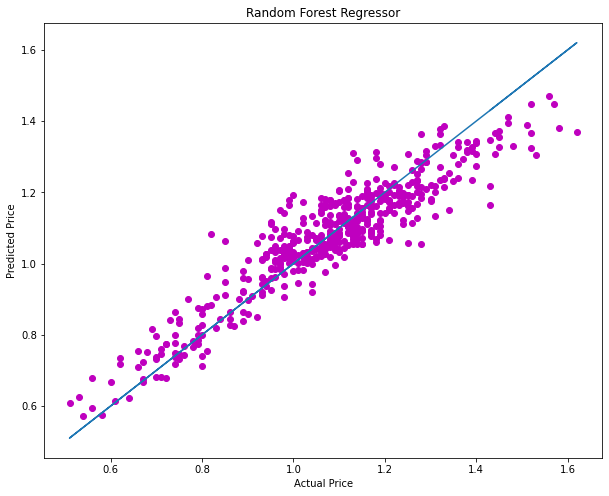

In [222]:
# Random Forest

plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=rfr_pred,color='m')
plt.plot(y_test,y_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Random Forest Regressor")
plt.show()

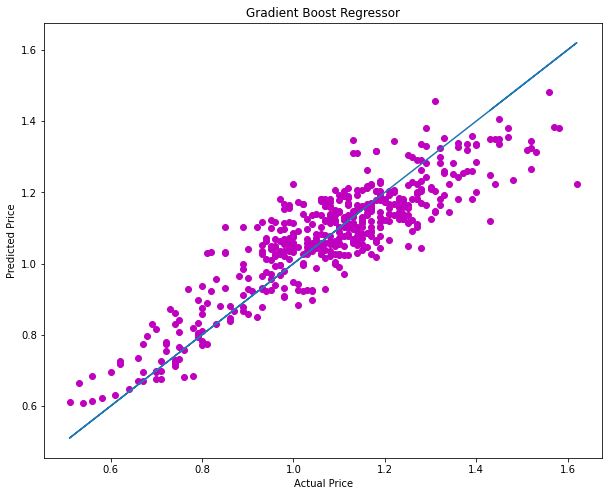

In [221]:
#Gradient Boost

plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=gb_pred,color='m')
plt.plot(y_test,y_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Gradient Boost Regressor")
plt.show()

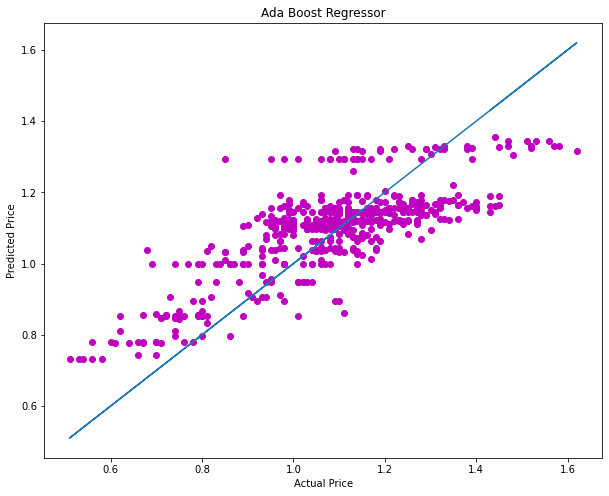

In [223]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=abr_pred,color='m')
plt.plot(y_test,y_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Ada Boost Regressor")
plt.show()

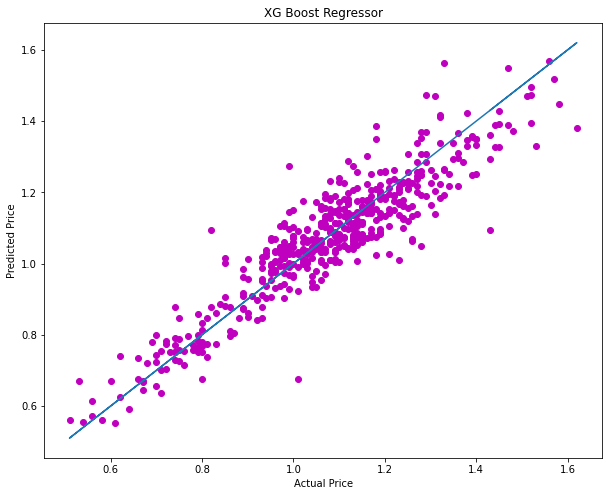

In [224]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=xgr_pred,color='m')
plt.plot(y_test,y_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("XG Boost Regressor")
plt.show()

It is clear that Ada Boost is certainly not the right model. 

We see better results with both Random Forest and XGB.

We will further hypertune these two models and see for any improvement.

# Hypertuning

In [225]:
#Importing GridearchCV

from sklearn.model_selection import GridSearchCV

In [115]:
# defining parameters for Random Forest


gr_param={'n_estimators':list(range(50,400,50)),'max_depth' : np.arange(2,15),'criterion':['mse','mae'],'max_features':['auto', 'sqrt', 'log2']}
gcv= GridSearchCV(estimator=rfr,param_grid=gr_param,scoring='r2',cv=5)

In [116]:
# Getting Best Parameters for Random Forest

gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'mse',
 'max_depth': 14,
 'max_features': 'log2',
 'n_estimators': 200}

In [117]:
# Trainig model with Random Forest Algorithm with best parameters and cross validating.

rfr1=RandomForestRegressor(criterion='mse',max_depth=14,max_features='log2',n_estimators=200)
rfr1.fit(x_train,y_train)
rfr1_pred=rfr1.predict(x_test)
testing_accu=r2_score(y_test,rfr1_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(rfr1,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is -2.0834253300038688 and the accuracy for testing is 85.8585191242051 


At crossfold 3 the CV score of is 24.771125787063852 and the accuracy for testing is 85.8585191242051 


At crossfold 4 the CV score of is 18.328592701101233 and the accuracy for testing is 85.8585191242051 


At crossfold 5 the CV score of is 26.077891611583297 and the accuracy for testing is 85.8585191242051 


At crossfold 6 the CV score of is 7.724903635528224 and the accuracy for testing is 85.8585191242051 


At crossfold 7 the CV score of is 19.911066539048296 and the accuracy for testing is 85.8585191242051 


At crossfold 8 the CV score of is 2.266464224426734 and the accuracy for testing is 85.8585191242051 


At crossfold 9 the CV score of is 15.727512839320775 and the accuracy for testing is 85.8585191242051 




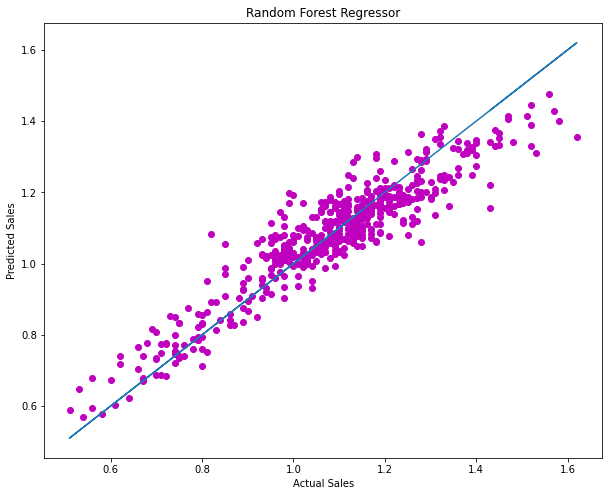

In [119]:
# Plotting graph after Hypertuning

plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=rfr1_pred,color='m')
plt.plot(y_test,y_test)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title("Random Forest Regressor")
plt.show()

In [124]:
# defining parameters for XB Boost

xgr_param={'n_estimators':list(range(50,400,50)),'max_depth' : np.arange(2,10),'learning_rate' :[0.01,0.1,0.2,0.3],'min_child_weight':np.arange(1,7), 'nthread':np.arange(1,6)}
gcv_1= GridSearchCV(estimator=xgr,param_grid=xgr_param,scoring='r2',cv=5)

In [125]:
# Getting best parameters

gcv_1.fit(x_train,y_train)
gcv_1.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 6,
 'n_estimators': 350,
 'nthread': 1}

In [126]:
# Trainig model with XG Boost Algorithm with best parameters and cross validating.

xgr_1=XGBRegressor(learning_rate=0.1,max_depth=7,min_child_weight=6,n_estimators=350,nthread=1)
xgr_1.fit(x_train,y_train)
xgr_1_pred=xgr_1.predict(x_test)
testing_accu=r2_score(y_test,xgr_1_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(xgr_1,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is -28.420508227414732 and the accuracy for testing is 85.16657690319592 


At crossfold 3 the CV score of is 26.9858328534297 and the accuracy for testing is 85.16657690319592 


At crossfold 4 the CV score of is 11.27613226400789 and the accuracy for testing is 85.16657690319592 


At crossfold 5 the CV score of is 13.11639594326825 and the accuracy for testing is 85.16657690319592 


At crossfold 6 the CV score of is 2.746340494274974 and the accuracy for testing is 85.16657690319592 


At crossfold 7 the CV score of is 6.379229741835821 and the accuracy for testing is 85.16657690319592 


At crossfold 8 the CV score of is -6.705331995163134 and the accuracy for testing is 85.16657690319592 


At crossfold 9 the CV score of is 11.00299012497926 and the accuracy for testing is 85.16657690319592 




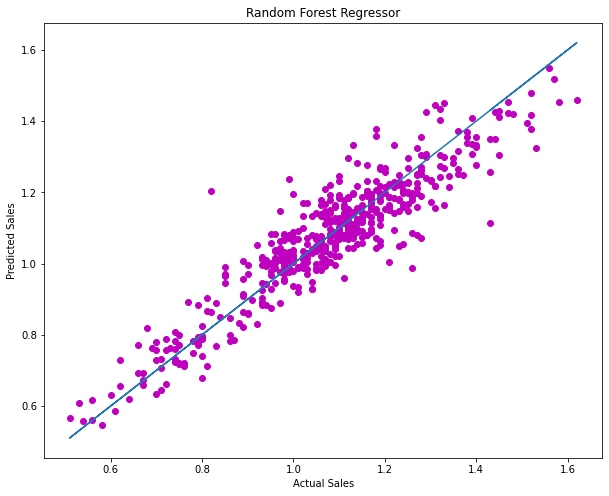

In [127]:
# Plotting graph after hyper tuning

plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=xgr_1_pred,color='m')
plt.plot(y_test,y_test)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title("Random Forest Regressor")
plt.show()

We observe a increase in accuracy in both models but we see better performance in Random Forest in terms of Cross Validation.

Thus we will move ahead with Random Forest Regressor as our final algorithm for model training.

In [128]:
# Training the model with Random Forest applying best parameters


rfr=RandomForestRegressor(criterion='mse',max_depth=14,max_features='log2',n_estimators=200)
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
testing_accu=r2_score(y_test,rfr_pred)*100

cv_score=cross_val_score(rfr,x,y,cv=5)
cv_mean=cv_score.mean()*100
print(f'The CV score of the model is {cv_mean} and the R2 Score for testing is {testing_accu} ')
print('\n')

print('Mean Squared Error of the model is : ',mean_squared_error(y_test,rfr_pred))
print('Mean Absolute Error of the model is : ',mean_absolute_error(y_test,rfr_pred))
print('Root Mean Squared Error of the model is : ',np.sqrt(mean_squared_error(y_test,rfr_pred)),'\n')

The CV score of the model is 24.715330005078624 and the R2 Score for testing is 85.43019408788464 


Mean Squared Error of the model is :  0.0055087178801881435
Mean Absolute Error of the model is :  0.057047415057542405
Root Mean Squared Error of the model is :  0.07422073753465498 



# Saving the best model

In [129]:
import pickle
filename='avocado.pkl'
pickle.dump(rfr,open(filename,'wb'))

# Conclusion

In [130]:
# Loading the model

load_model=pickle.load(open('avocado.pkl','rb'))

In [131]:
# Checking model score

result=load_model.score(x_test,y_test)
print(result)

0.8543019408788464


In [132]:
# Creatig dataframe for Test and Predicted Values

conclusion=pd.DataFrame([rfr.predict(x_test)[:],rfr_pred[:]],index=['Predicted','Original'])

In [133]:
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500
Predicted,1.137229,1.02809,1.105347,1.338045,1.144395,1.174115,1.084719,0.983524,0.67568,1.06756,1.196982,1.180576,1.032637,0.761273,1.079185,1.314843,1.174966,1.162841,0.948216,0.9618,0.863301,1.113962,1.173996,1.21566,1.11104,1.118561,0.767907,1.191995,1.306085,1.159949,1.021468,1.180682,1.01187,1.120365,1.14171,1.106312,1.17696,0.774305,1.099086,0.986533,0.908376,1.009583,1.009526,1.121674,0.817909,0.6085,1.055372,1.326426,1.313052,1.411237,1.082218,0.749082,1.089562,0.87627,0.826002,1.39485,1.022578,1.148154,1.076614,1.090231,1.077894,1.306884,1.183691,1.096813,1.332018,1.211879,0.708148,1.059913,1.189697,1.014234,1.085204,0.976619,1.096383,0.97904,1.3269,1.225746,1.031081,0.937466,1.073831,1.193852,1.340195,1.172684,1.086741,0.849184,0.91188,1.140291,1.069505,1.029931,1.062565,1.18343,1.227861,1.218906,0.943577,1.191741,1.287956,1.150542,1.053628,1.039858,1.083157,0.900901,1.062357,1.160951,1.072295,1.193611,0.971311,1.04263,0.986846,1.202069,1.272077,1.191133,1.285332,0.962474,1.070765,1.188207,0.905939,1.04318,1.026043,1.219979,0.6147,1.166601,1.177614,1.127238,1.017194,1.070007,1.189065,1.049786,1.164977,1.026538,1.180542,0.862737,0.77501,1.192835,0.752333,0.981391,0.843542,1.168533,1.23504,1.162591,0.7177,1.161828,1.18287,1.041023,1.176341,1.044361,0.920224,1.188981,1.231622,0.843608,0.926016,1.261338,0.995838,0.796953,1.093522,0.859125,1.200287,1.078961,1.367482,1.177021,1.032724,1.355822,1.078514,1.039943,1.123247,0.739721,0.959096,1.048216,0.990337,1.119278,1.016301,1.057208,1.177219,1.014621,1.171956,1.123126,1.143116,1.050762,1.132882,1.023695,1.04776,0.896159,0.823634,1.060483,1.072349,1.20813,1.304875,1.128385,1.32501,1.170661,1.082674,1.203461,1.163553,1.192202,1.109041,0.719005,1.063999,1.225283,1.279867,1.03092,0.910205,1.035317,1.03817,1.042922,1.113424,1.140745,0.738545,1.002011,1.238224,1.241324,1.255207,0.712733,1.318123,1.329582,0.6783,1.134091,1.172628,1.001077,1.17821,1.293041,1.055672,1.23569,1.143479,1.019505,1.103535,1.289585,1.213547,1.185896,0.871277,1.014074,0.945759,1.186749,0.900915,1.213607,1.36257,1.076468,1.088154,1.061078,1.217548,